In [6]:
#author:fkw
#utf-8
#creat time:2021/11/04
#K-means
#dataset=iris
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
#load the dataset
iris = datasets.load_iris()
# 特征值
diris = iris.data
# 标签
tiris = iris.target
labels = ['setosa', 'versicolor', 'virginica']

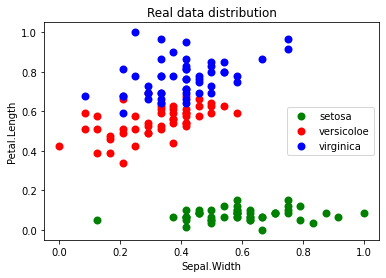

In [7]:
# 数组归一化 x=(x-min)/(max-min)
for i in range(4):
    diris[:, i] = (diris[:, i]-np.min(diris[:, i]))/(np.max(diris[:, i])-np.min(diris[:, i]))
#绘制dataset散点图,选取2,3列作为Xlable,ylabel
x_axis=diris[:,1]
y_axis=diris[:,2]
plt.scatter(x_axis[tiris==0],y_axis[tiris==0],c='green',marker='.',linewidths=5)
plt.scatter(x_axis[tiris==1],y_axis[tiris==1],c='red',marker='.',linewidths=5)
plt.scatter(x_axis[tiris==2],y_axis[tiris==2],c='blue',marker='.',linewidths=5)
plt.legend(["setosa","versicoloe","virginica"])
plt.title("Real data distribution")
plt.xlabel('Sepal.Width')
plt.ylabel('Petal.Length')
plt.show()


In [8]:
#kmeans
#随机生成K个center
def randcenter(k,data):
    len_data=data.shape[1]
    center=np.random.random((k,len_data))
    #print(center)
    return center
#print(randcenter(3,diris)) 
#计算所有样本和center之间的距离
def caldis(center,data):
    len_center=center.shape[0]
    len_data=diris.shape[0]
    #print(len_data,len_center)
    dis=np.zeros((len_data,len_center))
    for i in range(0,len_data):
        for j in range(0,len_center):
            dis[i,j]=np.math.sqrt(sum((data[i]-center[j])**2))
    return dis
#print(caldis(randcenter(3,diris),diris))
dis=caldis(randcenter(3,diris),diris)
#对样本进行分类
def cla(dis):
    ans=np.zeros((dis.shape[0],1))
    #选出每行最小的值
    ans=np.argmin(dis,axis=1)
    return ans
#print(cla(dis))
#训练
def train(k,data):
    #初始化center
    center=randcenter(k,data)
    ans=np.zeros((data.shape[0],1))
    ans_old=np.ones((data.shape[0],1))
    while(1):
        #print(ans_old,ans)
        if((ans_old-ans).any()==0):
            return ans
        ans_old=ans
        #计算新的ans(分类结果)
        ans=cla(caldis(center,data))
        #更新center
        for i in range(0,center.shape[0]):
            center[i]=np.mean(data[ans==i],axis=0)
        #print(center)
                

In [9]:
#计算分类结果
ans=train(3,diris)
print(ans)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0]


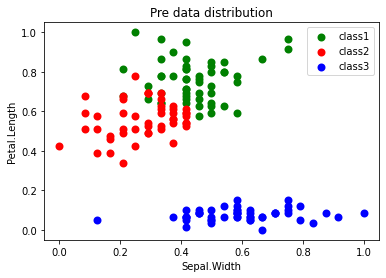

In [10]:
plt.scatter(x_axis[ans==0],y_axis[ans==0],c='green',marker='.',linewidths=5)
plt.scatter(x_axis[ans==1],y_axis[ans==1],c='red',marker='.',linewidths=5)
plt.scatter(x_axis[ans==2],y_axis[ans==2],c='blue',marker='.',linewidths=5)
plt.legend(["class1","class2","class3"])
plt.title("Pre data distribution")
plt.xlabel('Sepal.Width')
plt.ylabel('Petal.Length')
plt.show()